In [1]:
import pandas as peacepd
import numpy as peacenp
import matplotlib.pyplot as peaceplt
import seaborn as peacesns
import scipy.stats as peacesps
import statsmodels.api as peacestats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX

# **QUESTION 1 - Linear Regression with one explanatory variable**

In [2]:
df_UK_house_prices = peacepd.read_excel('/Monthly.xls')

In [3]:
df_UK_house_prices.head()

,Unnamed: 0,Average House Price,INDEX Q1 1993=100,Seasonally Adjusted Index,Monthly % Change (SA),Year % Change,Latest 3 months on previous 3 months
0,1991-01-01,53051.721106,105.832511,107.127299,NaN,NaN,NaN
1,1991-02-01,53496.798746,106.720393,107.494996,0.003432,NaN,NaN
2,1991-03-01,52892.861606,105.515603,106.525649,-0.009018,NaN,NaN
3,1991-04-01,53677.435270,107.080744,107.126622,0.005642,NaN,NaN
4,1991-05-01,54385.726747,108.493710,107.266757,0.001308,NaN,NaN


In [4]:
# Rename the Unnamed column
df_UK_house_prices.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

In [5]:
df_UK_house_prices.head()

,Date,Average House Price,INDEX Q1 1993=100,Seasonally Adjusted Index,Monthly % Change (SA),Year % Change,Latest 3 months on previous 3 months
0,1991-01-01,53051.721106,105.832511,107.127299,NaN,NaN,NaN
1,1991-02-01,53496.798746,106.720393,107.494996,0.003432,NaN,NaN
2,1991-03-01,52892.861606,105.515603,106.525649,-0.009018,NaN,NaN
3,1991-04-01,53677.435270,107.080744,107.126622,0.005642,NaN,NaN
4,1991-05-01,54385.726747,108.493710,107.266757,0.001308,NaN,NaN


In [6]:
df_UK_house_prices.tail()

,Date,Average House Price,INDEX Q1 1993=100,Seasonally Adjusted Index,Monthly % Change (SA),Year % Change,Latest 3 months on previous 3 months
363,2021-04-01,238830.909855,476.442128,475.555369,0.023475,0.071399,0.017338
364,2021-05-01,242831.936735,484.423749,484.270329,0.018326,0.109317,0.024579
365,2021-06-01,245432.458835,489.611512,487.325181,0.006308,0.134147,0.039188
366,2021-07-01,244228.556584,487.209856,484.358757,-0.006087,0.105425,0.035456
367,2021-08-01,248857.161646,496.443428,494.475182,0.020886,0.110360,0.029264


In [7]:
df_UK_house_prices.dtypes

,0
Date,datetime64[ns]
Average House Price,float64
INDEX Q1 1993=100,float64
Seasonally Adjusted Index,float64
Monthly % Change (SA),float64
Year % Change,float64
Latest 3 months on previous 3 months,float64


In [8]:
# Select only dates within 2016 as requested by the Question
start_date = peacepd.to_datetime('1991-01-01')
end_date = peacepd.to_datetime('2016-12-31')

df_UK_house_prices_within_2016 = df_UK_house_prices[(df_UK_house_prices['Date'] >= start_date) & (df_UK_house_prices['Date'] <= end_date)]

In [9]:
df_UK_house_prices_within_2016.tail()

,Date,Average House Price,INDEX Q1 1993=100,Seasonally Adjusted Index,Monthly % Change (SA),Year % Change,Latest 3 months on previous 3 months
307,2016-08-01,206144.961815,411.237157,409.465432,0.007744,0.055643,0.009269
308,2016-09-01,206014.691677,410.977282,410.292238,0.002019,0.053326,0.010542
309,2016-10-01,205904.191651,410.756846,410.256066,-0.000088,0.046223,0.011086
310,2016-11-01,204947.430028,408.848209,410.018088,-0.000580,0.044025,0.008036
311,2016-12-01,205897.846011,410.744187,412.912278,0.007059,0.045171,0.005799


In [10]:
# Read the FTSE100 Index Data
df_FTSE100_index = peacepd.read_csv('/FTSE100.csv')

In [11]:
df_FTSE100_index.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,12/1/2016,6783.79,6789.30,6688.41,6752.93,966722048,6752.93
1,11/1/2016,6954.22,6993.79,6903.61,6917.14,780871680,6917.14
2,10/3/2016,6899.33,6996.43,6898.09,6983.52,745408640,6983.52
3,9/1/2016,6781.51,6826.22,6723.21,6745.97,991756480,6745.97
4,8/1/2016,6724.43,6769.41,6678.45,6693.95,727709696,6693.95


In [12]:
df_FTSE100_index.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
307,5/1/1991,2487.399902,2554.899902,2444.600098,2499.500000,0,2499.500000
308,4/1/1991,2456.500000,2555.300049,2438.600098,2486.199951,0,2486.199951
309,3/1/1991,2374.899902,2527.100098,2368.399902,2456.500000,0,2456.500000
310,2/1/1991,2168.500000,2388.399902,2155.600098,2380.899902,0,2380.899902
311,1/1/1991,2143.500000,2182.100098,2052.300049,2170.300049,0,2170.300049


In [13]:
df_FTSE100_index.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Adj Close,float64


In [14]:
df_FTSE100_index['Date'] = peacepd.to_datetime(df_FTSE100_index['Date'])

In [15]:
# df_FTSE100_index_within_2016 = df_FTSE100_index[(df_FTSE100_index['Date'] >= start_date) & (df_FTSE100_index['Date'] <= end_date)]

In [16]:
# Sort the FTSE100 data in ascending order of date i.e. reverse the data
df_FTSE100_index_sorted = df_FTSE100_index.sort_values(by='Date')

In [17]:
df_FTSE100_index_sorted

,Date,Open,High,Low,Close,Volume,Adj Close
311,1991-01-01,2143.500000,2182.100098,2052.300049,2170.300049,0,2170.300049
310,1991-02-01,2168.500000,2388.399902,2155.600098,2380.899902,0,2380.899902
309,1991-03-01,2374.899902,2527.100098,2368.399902,2456.500000,0,2456.500000
308,1991-04-01,2456.500000,2555.300049,2438.600098,2486.199951,0,2486.199951
307,1991-05-01,2487.399902,2554.899902,2444.600098,2499.500000,0,2499.500000
...,...,...,...,...,...,...,...
4,2016-08-01,6724.430000,6769.410000,6678.450000,6693.950000,727709696,6693.950000
3,2016-09-01,6781.510000,6826.220000,6723.210000,6745.970000,991756480,6745.970000
2,2016-10-03,6899.330000,6996.430000,6898.090000,6983.520000,745408640,6983.520000
1,2016-11-01,6954.220000,6993.790000,6903.610000,6917.140000,780871680,6917.140000


In [18]:
df_FTSE100_index_sorted.shape

(312, 7)

In [19]:
df_UK_house_prices_within_2016.shape

(312, 7)

In [20]:
# To Create a Regression model and calculate the correlation coefficient

df_UK_house_prices_within_2016['Monthly Return'] = df_UK_house_prices_within_2016['Average House Price'] / df_UK_house_prices_within_2016['Average House Price'].shift(1) - 1

df_FTSE100_index_sorted['Monthly Return'] = df_FTSE100_index_sorted['Adj Close'] / df_FTSE100_index_sorted['Adj Close'].shift(1) - 1

<ipython-input-20-dc9143a3cc9d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_UK_house_prices_within_2016['Monthly Return'] = df_UK_house_prices_within_2016['Average House Price'] / df_UK_house_prices_within_2016['Average House Price'].shift(1) - 1


In [21]:
y = df_FTSE100_index_sorted.iloc[1:,:]
X = df_UK_house_prices_within_2016.iloc[1:,:]

In [22]:
slope, intercept, r_value, p_value, std_err = peacesps.linregress(X['Monthly Return'], y['Monthly Return'])

In [23]:
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'R_Value: {r_value}')
print(f'p-value: {p_value}')

Slope: 0.09324142754349966
Intercept: 0.004047837686662456
R_Value: 0.026551295701909915
p-value: 0.6409049000031651


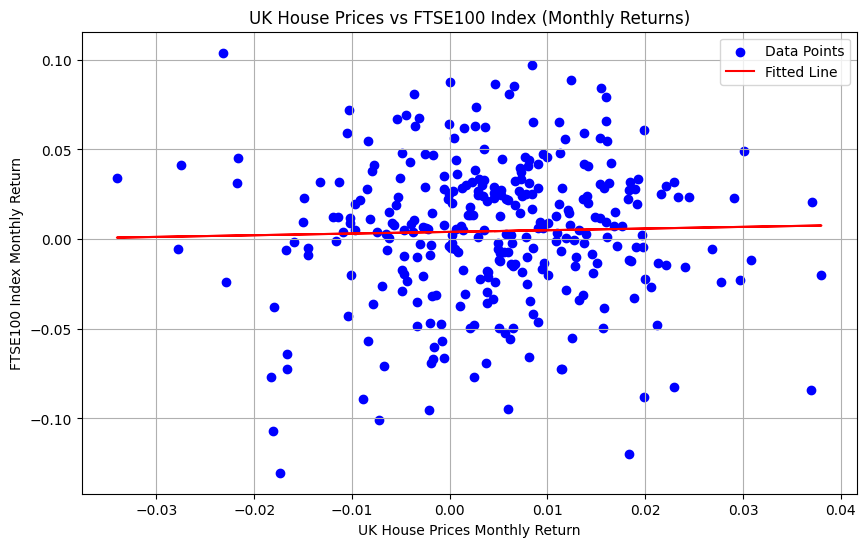

In [24]:
peaceplt.figure(figsize=(10, 6))
peaceplt.scatter(X['Monthly Return'], y['Monthly Return'], color='blue', label='Data Points')
peaceplt.plot(X['Monthly Return'], intercept + slope * X['Monthly Return'], color='red', label='Fitted Line')
peaceplt.xlabel('UK House Prices Monthly Return')
peaceplt.ylabel('FTSE100 Index Monthly Return')
peaceplt.grid()
peaceplt.legend()
peaceplt.title('UK House Prices vs FTSE100 Index (Monthly Returns)')
peaceplt.show()

In [25]:
correlation_coefficient = peacenp.corrcoef(X['Monthly Return'], y['Monthly Return'])[0, 1]
print('%.16f' % correlation_coefficient)

0.0265512957019099


In [26]:
if(correlation_coefficient < 0.05):
  print("There is a significant relationship between the two variables.")
else:
  print("There is no significant relationship between the two variables.")

There is a significant relationship between the two variables.


# **QUESTION 2 - Linear Regression with multiple explanatory variables**

In [27]:
df_college = peacepd.read_csv('/College.csv')

In [28]:
df_college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [29]:
#Rename the column with the Unnamed column name
df_college.rename(columns={'Unnamed: 0': 'Universities'}, inplace=True)

In [30]:
df_college.head()

,Universities,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [31]:
# Select only the columns needed

needed_columns = ['Apps', 'Enroll', 'Outstate', 'Top10perc', 'Top25perc', 'Grad.Rate']
df_college_needed = df_college[needed_columns]

In [32]:
df_college_needed.head()

,Apps,Enroll,Outstate,Top10perc,Top25perc,Grad.Rate
0,1660,721,7440,23,52,60
1,2186,512,12280,16,29,56
2,1428,336,11250,22,50,54
3,417,137,12960,60,89,59
4,193,55,7560,16,44,15


(a) Calculate the correlation coefficients of the aforementioned variables.

In [33]:
college_correlation_coefficient = df_college_needed.corr()
print("Correlation Coefficients:")
print(college_correlation_coefficient.to_markdown(tablefmt="grid", floatfmt=".6f", headers=""))

Correlation Coefficients:
+-----------+----------+-----------+-----------+----------+----------+-----------+
| Apps      | 1.000000 |  0.846822 |  0.050159 | 0.338834 | 0.351640 |  0.146755 |
+-----------+----------+-----------+-----------+----------+----------+-----------+
| Enroll    | 0.846822 |  1.000000 | -0.155477 | 0.181294 | 0.226745 | -0.022341 |
+-----------+----------+-----------+-----------+----------+----------+-----------+
| Outstate  | 0.050159 | -0.155477 |  1.000000 | 0.562331 | 0.489394 |  0.571290 |
+-----------+----------+-----------+-----------+----------+----------+-----------+
| Top10perc | 0.338834 |  0.181294 |  0.562331 | 1.000000 | 0.891995 |  0.494989 |
+-----------+----------+-----------+-----------+----------+----------+-----------+
| Top25perc | 0.351640 |  0.226745 |  0.489394 | 0.891995 | 1.000000 |  0.477281 |
+-----------+----------+-----------+-----------+----------+----------+-----------+
| Grad.Rate | 0.146755 | -0.022341 |  0.571290 | 0.494989 | 0

(b) Perform stepwise linear regression on the independent variables

In [34]:
y = df_college_needed['Grad.Rate']
X = df_college_needed[['Apps', 'Enroll', 'Outstate', 'Top10perc', 'Top25perc']]
# X = df_college_needed.drop(columns=['Grad.Rate'])

X = peacestats.add_constant(X)

In [35]:
# Function for stepwise selection - this is adapted from https://github.com/AakkashVijayakumar/stepwise-regression
def adapted_stepwise_selection(X, y, init_dict=[], in_threshold=0.05, out_threshold=0.10, verbose=True):
    list_included = list(init_dict)
    while True:
        changed = False

        # forward step
        list_excluded = list(set(X.columns) - set(list_included))
        new_pval = peacepd.Series(index=list_excluded)
        for new_column in list_excluded:
            peace_model = peacestats.OLS(y, peacestats.add_constant(peacepd.DataFrame(X[list_included + [new_column]]))).fit()
            new_pval[new_column] = peace_model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < in_threshold:
            best_feature = new_pval.idxmin()
            list_included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        peace_model = peacestats.OLS(y, peacestats.add_constant(peacepd.DataFrame(X[list_included]))).fit()
        pvalues = peace_model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > out_threshold:
            changed = True
            worst_feature = pvalues.idxmax()
            list_included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return list_included

res = adapted_stepwise_selection(X, y)

print('Resulting features:')
print(res)

Add  const                          with p-value 0.0
Add  Outstate                       with p-value 1.62893e-68
Add  Top25perc                      with p-value 4.69503e-15
Resulting features:
['const', 'Outstate', 'Top25perc']


(c) The Useful Predictor Variables are:
(i) Outstate
(ii) Top25perc

This is because of their p_value.

(d) Model selection using Bayesian Information Criterion

In [36]:
#Fit the model using the selected features

X_sel = X[res]
peace_model = peacestats.OLS(y, X_sel).fit()
print(peace_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Grad.Rate   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     235.0
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           1.82e-80
Time:                        21:26:01   Log-Likelihood:                -3127.2
No. Observations:                 777   AIC:                             6260.
Df Residuals:                     774   BIC:                             6274.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.0860      1.607     20.593      0.0

In [37]:
# Calculate the Bayesian Information Criterion

bayesian_information_criterion = peace_model.bic
print("Bayesian Information Criterion:", bayesian_information_criterion)

Bayesian Information Criterion: 6274.3329824422635


(e) Comparing the model accuracy

In [38]:
# Compare the model accuracy

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model using all predictors
entire_model = peacestats.OLS(y_train, X_train).fit()
y_prediction_entire = entire_model.predict(X_test)
mean_squared_entire = mean_squared_error(y_test, y_prediction_entire)
print("Mean Squared Error (Entire Model):", mean_squared_entire)

Mean Squared Error (Entire Model): 128.68965237614051


In [39]:
# Fit the model using selected predictors

X_train_sel = X_train[res]
X_test_sel = X_test[res]

selected_model = peacestats.OLS(y_train, X_train_sel).fit()
y_prediction_selected = selected_model.predict(X_test_sel)
mean_squared_selected = mean_squared_error(y_test, y_prediction_selected)
print("Mean Squared Error (Selected Model):", mean_squared_selected)

Mean Squared Error (Selected Model): 121.50146022950815


(f) Predict graduation rate for Carnegie Mellon University

In [40]:
df_college

,Universities,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [41]:
df_college.set_index('Universities', inplace=True)

In [42]:
cmu_full_features = df_college[df_college.index.str.contains('Carnegie Mellon University')]
#cmu_stepwise_features = (college_data[college_data.index.str.contains('Carnegie Mellon University')][stepwise_features])
# cmu_stepwise_feature

In [43]:
df_cmu_X = cmu_full_features[['Outstate', 'Top25perc']]
df_cmu_X

,Outstate,Top25perc
Universities,,
Carnegie Mellon University,17900,89


In [44]:
if 'const' not in df_cmu_X.columns:
    df_cmu_X.insert(0,'const',1)

df_cmu_X

,const,Outstate,Top25perc
Universities,,,
Carnegie Mellon University,1,17900,89


In [45]:
# Predict graduation rate using the model selected

predicted_graduation_rate = selected_model.predict(df_cmu_X)
print("Predicted Graduation Rate for Carnegie Mellon University:", predicted_graduation_rate.values)

Predicted Graduation Rate for Carnegie Mellon University: [86.83968987]


# **QUESTION 3 - Open Study**

In [46]:
df_gdp_per_capita = peacepd.read_csv('/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_3401556.csv', skiprows=4)

In [47]:
df_transport_data = peacepd.read_csv('/API_TX.VAL.TRVL.ZS.WT_DS2_en_csv_v2_18458.csv', skiprows=4)

In [48]:
df_gdp_per_capita.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26940.264110,28419.264530,28449.712950,29329.081750,30918.483580,31902.809820,24008.127820,29127.759380,33300.838820,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.342518,166.263682,171.961916,182.018480,192.639989,202.847824,...,1678.553610,1498.805084,1346.301281,1485.753579,1558.612079,1508.486886,1356.088871,1545.956697,1642.432039,1672.505957
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,626.512929,566.881130,523.053012,526.140801,492.090631,497.741431,512.055098,355.777826,352.603733,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,122.193931,127.732834,134.130070,139.291222,148.821355,156.314136,...,2248.518426,1882.518808,1648.920269,1590.555785,1735.445833,1813.609146,1688.470871,1769.171853,1788.875347,1584.333285
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5011.984427,3217.339240,1809.709377,2439.374439,2540.508879,2191.347764,1450.905111,1927.474078,2933.484644,2309.521620


In [49]:
df_transport_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,Travel services (% of commercial service exports),TX.VAL.TRVL.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,86.082926,86.502936,86.375526,86.538972,87.382643,81.195601,86.924168,87.864724,NaN,NaN
1,Africa Eastern and Southern,AFE,Travel services (% of commercial service exports),TX.VAL.TRVL.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,58.033783,57.414383,57.167300,59.058913,60.175044,31.902818,29.945262,37.488640,35.768159,NaN
2,Afghanistan,AFG,Travel services (% of commercial service exports),TX.VAL.TRVL.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,10.187853,11.050082,0.512371,4.497357,14.367959,10.803949,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Travel services (% of commercial service exports),TX.VAL.TRVL.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,18.831927,31.877371,45.398076,37.669790,29.193098,12.123303,14.802091,26.268771,NaN,NaN
4,Angola,AGO,Travel services (% of commercial service exports),TX.VAL.TRVL.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,92.560769,87.610526,89.419479,86.184631,84.482965,24.195671,23.816580,23.916647,9.923331,NaN


In [50]:
df_gdp_per_capita = df_gdp_per_capita.drop(columns=['Indicator Name', 'Indicator Code'])

In [51]:
df_transport_data = df_transport_data.drop(columns=['Indicator Name', 'Indicator Code'])

In [52]:
df_gdp_per_capita = peacepd.melt(df_gdp_per_capita, id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='GDP per Capita')

In [53]:
df_transport_data = peacepd.melt(df_transport_data, id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='Transport Data')

In [54]:
df_merge_gdp_transport = peacepd.merge(df_gdp_per_capita, df_transport_data, on=['Country Name', 'Country Code', 'Year'], how='inner')

In [55]:
df_merge_gdp_transport.shape

(17024, 5)

In [56]:
df_merge_gdp_transport.sample(10)

,Country Name,Country Code,Year,GDP per Capita,Transport Data
11979,Argentina,ARG,2005,5086.627761,43.026400
2575,OECD members,OED,1969,2417.155130,NaN
6183,Europe & Central Asia,ECS,1983,4755.142246,27.538021
2383,British Virgin Islands,VGB,1968,NaN,NaN
13511,El Salvador,SLV,2010,3017.307395,26.604925
9530,Suriname,SUR,1995,1591.729379,NaN
2210,Georgia,GEO,1968,NaN,NaN
8489,Tunisia,TUN,1991,1516.294272,58.478081
9508,Post-demographic dividend,PST,1995,25097.191750,32.423570
8636,Kiribati,KIR,1992,791.901929,8.151587


In [57]:
df_merge_gdp_transport = df_merge_gdp_transport.dropna()

In [58]:
df_merge_gdp_transport.shape

(8945, 5)

In [59]:
df_merge_gdp_transport.head()

,Country Name,Country Code,Year,GDP per Capita,Transport Data
35,Canada,CAN,1960,2264.948497,41.923713
115,Israel,ISR,1960,1444.164973,29.213483
263,South Africa,ZAF,1960,529.561923,64.571429
301,Canada,CAN,1961,2246.083566,49.883930
381,Israel,ISR,1961,1687.569351,26.548673


# Extracted Data for Nigeria as a case study

In [60]:
df_Nigeria = df_merge_gdp_transport[df_merge_gdp_transport['Country Name'] == 'Nigeria']

# Time Series Analysis of Travel Services and GDP per capita

In [61]:
df_Nigeria['Year'] = peacepd.to_datetime(df_Nigeria['Year'])

<ipython-input-61-b11ee17f1394>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Nigeria['Year'] = peacepd.to_datetime(df_Nigeria['Year'])


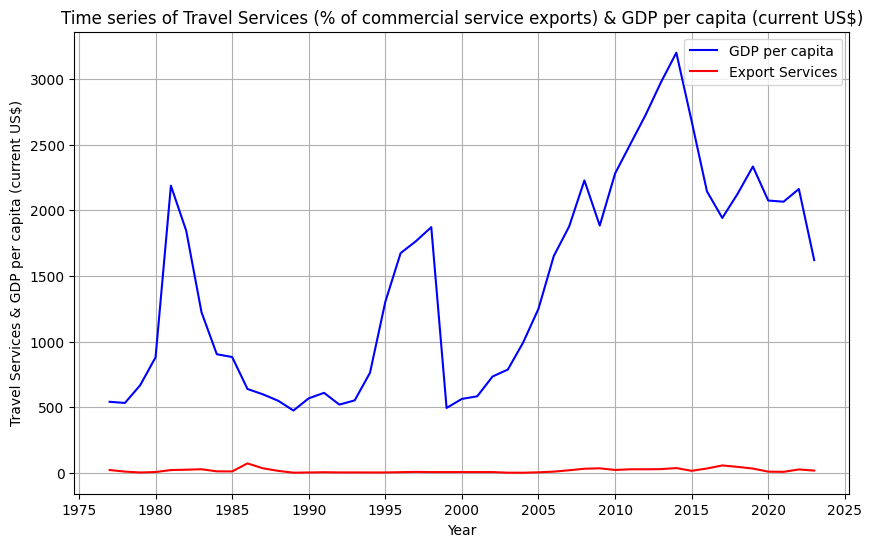

In [62]:
peaceplt.figure(figsize=(10, 6))
peaceplt.plot(df_Nigeria['Year'], df_Nigeria['GDP per Capita'], color='blue', label='GDP per capita')
peaceplt.plot(df_Nigeria['Year'], df_Nigeria['Transport Data'], color='red', label='Export Services')
peaceplt.xlabel('Year')
peaceplt.ylabel('Travel Services & GDP per capita (current US$)')
peaceplt.grid()
peaceplt.legend()
peaceplt.title('Time series of Travel Services (% of commercial service exports) & GDP per capita (current US$)')
peaceplt.show()

# Build of a Linear Regression Model and Visualization

In [63]:
y = df_Nigeria['GDP per Capita']
X = df_Nigeria['Transport Data']

In [64]:
slope, intercept, r_value, p_value, std_err = peacesps.linregress(X, y)

In [65]:
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'R_Value: {r_value}')
print(f'p-value: {p_value}')

Slope: 22.136172749486835
Intercept: 1062.5952487011596
R_Value: 0.4344422783210175
p-value: 0.0022786527074971498


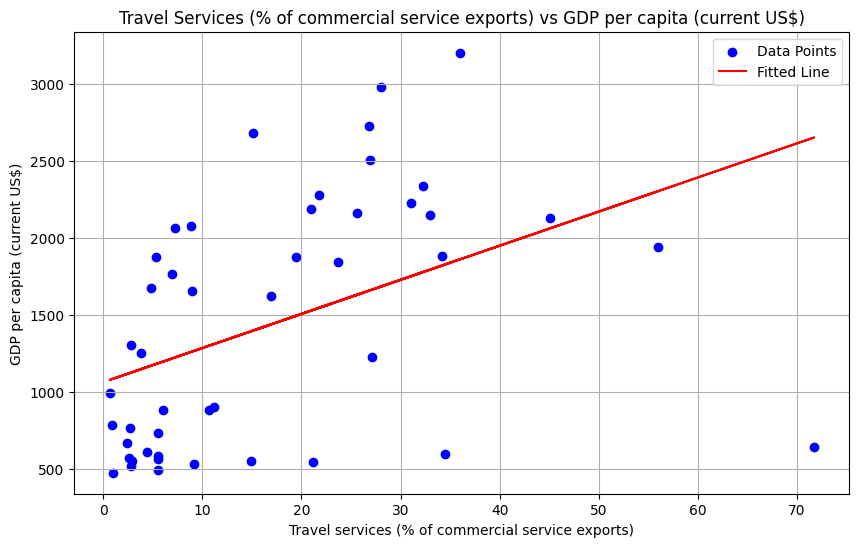

In [66]:
peaceplt.figure(figsize=(10, 6))
peaceplt.scatter(X, y, color='blue', label='Data Points')
peaceplt.plot(X, intercept + slope * X, color='red', label='Fitted Line')
peaceplt.xlabel('Travel services (% of commercial service exports)')
peaceplt.ylabel('GDP per capita (current US$)')
peaceplt.grid()
peaceplt.legend()
peaceplt.title('Travel Services (% of commercial service exports) vs GDP per capita (current US$)')
peaceplt.show()

In [67]:
df_Nigeria.dtypes

,0
Country Name,object
Country Code,object
Year,datetime64[ns]
GDP per Capita,float64
Transport Data,float64


# Forecasting Travel Services for 2021 using ARIMAX

In [68]:
# Filtered Data till 2020

df_Nigeria_filtered = df_Nigeria[df_Nigeria['Year'].dt.year <= 2020]

In [69]:
df_Nigeria_filtered_Indexed = df_Nigeria_filtered.set_index('Year')

In [70]:
gdp = df_Nigeria_filtered_Indexed['GDP per Capita']
transport = df_Nigeria_filtered_Indexed['Transport Data']

In [71]:
train_size = int(len(transport) * 0.8)
train_transport, test_transport = transport[:train_size], transport[train_size:]
train_gdp, test_gdp = gdp[:train_size], gdp[train_size:]


In [72]:
# Fit the ARIMAX Model

peace_model = SARIMAX(train_transport, exog=train_gdp, order=(1,1,1))
arimax_result = peace_model.fit(disp=False)
print(arimax_result.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         Transport Data   No. Observations:                   35
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -134.853
Date:                Wed, 16 Oct 2024   AIC                            277.706
Time:                        21:26:05   BIC                            283.811
Sample:                    01-01-1977   HQIC                           279.788
                         - 01-01-2011                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
GDP per Capita     0.0048      0.013      0.373      0.709      -0.020       0.030
ar.L1              0.5089      0.203      2.504      0.012       0.111       0.907
ma.L1             -0.9986      9.918

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX RMSE: 17.74133400851144


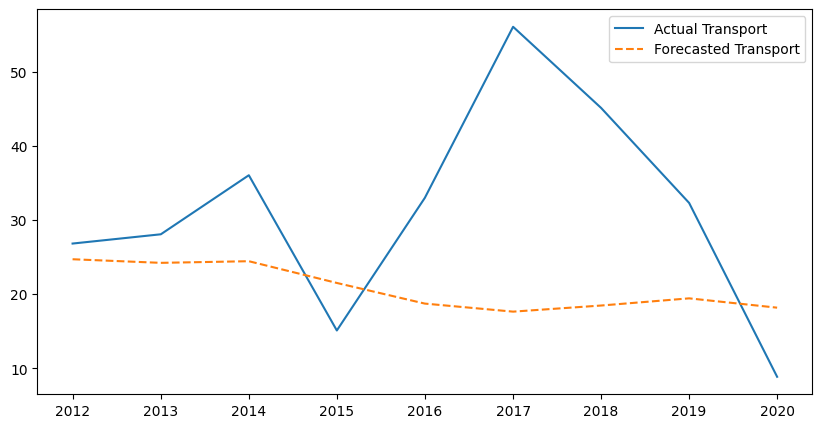

In [73]:
forecast = arimax_result.predict(start=len(train_transport),
                                 end=len(transport)-1, exog=test_gdp)
#print(f'Forecasted Value for 2021: {forecast}')

# Evaluate the model
rmse = peacenp.sqrt(mean_squared_error(test_transport, forecast))
print(f'ARIMAX RMSE: {rmse}')

# Plot the results
peaceplt.figure(figsize=(10, 5))
peaceplt.plot(test_transport.index, test_transport, label='Actual Transport')
peaceplt.plot(test_transport.index, forecast, label='Forecasted Transport', linestyle='--')
peaceplt.legend()
peaceplt.show()


In [74]:
df_Nigeria.tail()

,Country Name,Country Code,Year,GDP per Capita,Transport Data
15868,Nigeria,NGA,2019-01-01,2334.023642,32.300852
16134,Nigeria,NGA,2020-01-01,2074.613748,8.868846
16400,Nigeria,NGA,2021-01-01,2065.774410,7.250054
16666,Nigeria,NGA,2022-01-01,2162.633732,25.562574
16932,Nigeria,NGA,2023-01-01,1621.123515,16.963199


In [75]:
gdp_2021 = df_Nigeria[df_Nigeria['Year'].dt.year == 2021]['GDP per Capita'].values[0]
print(f'GDP per capita for 2021: {gdp_2021}')

GDP per capita for 2021: 2065.77441


In [76]:
# Reshape the exogenous variable (GDP for 2021) to be 2D

gdp_2021 = peacenp.array([gdp_2021]).reshape(1, 1)

print(f'GDP per capita for 2021: {gdp_2021}')

GDP per capita for 2021: [[2065.77441]]


In [77]:
forecast_2021 = arimax_result.predict(start=len(train_transport), end=len(train_transport), exog=[gdp_2021])
print(f'Predicted Travel services for 2021: {forecast_2021[0]}')

Predicted Travel services for 2021: 21.5368529037641


<ipython-input-77-35e7d1b6bb36>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Predicted Travel services for 2021: {forecast_2021[0]}')


In [78]:
df_Nigeria_filtered

,Country Name,Country Code,Year,GDP per Capita,Transport Data
4696,Nigeria,NGA,1977-01-01,541.156246,21.140940
4962,Nigeria,NGA,1978-01-01,532.217434,9.156194
5228,Nigeria,NGA,1979-01-01,667.981722,2.419355
5494,Nigeria,NGA,1980-01-01,880.061984,6.006494
5760,Nigeria,NGA,1981-01-01,2187.886436,20.979021
6026,Nigeria,NGA,1982-01-01,1844.849844,23.684211
6292,Nigeria,NGA,1983-01-01,1223.603921,27.147766
6558,Nigeria,NGA,1984-01-01,903.449352,11.144578
6824,Nigeria,NGA,1985-01-01,882.282703,10.638298
7090,Nigeria,NGA,1986-01-01,638.731696,71.753986


In [79]:
df_Nigeria_filtered['Date Ordinal'] = df_Nigeria_filtered['Year'].apply(lambda x: x.toordinal())

<ipython-input-79-1d83c59de0c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Nigeria_filtered['Date Ordinal'] = df_Nigeria_filtered['Year'].apply(lambda x: x.toordinal())


In [81]:
# Fit Linear Regression Model

X = df_Nigeria_filtered[['Date Ordinal']]
y = df_Nigeria_filtered['Transport Data']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [82]:
# Predict Unemployment Rate by 2020

year_2021 = datetime.datetime(2021, 1, 1)
year_2021_ordinal = year_2021.toordinal()

transport_2021 = model.predict([[year_2021_ordinal]])
print("Predicted Transportation in 2021:", transport_2021[0])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted Transportation in 2021: 25.052657069870065


In [83]:
arima_model_fit = peacestats.tsa.ARIMA(y, order=(5, 1, 0)).fit()
forecast = arima_model_fit.forecast(steps=1)
print("Predicted Transportation in 2021 (ARIMA):", forecast)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


Predicted Transportation in 2021 (ARIMA): 44    22.45508
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [84]:
# Evaluate Performance of Model

y_prediction = model.predict(X)

mse = mean_squared_error(y, y_prediction)
print(f"Mean Squared Error:, {mse}")

mean_percentage = mean_absolute_percentage_error(y, y_prediction)
print(f"Mean Absolute Percentage Error:, {mean_percentage * 100:.2f}%")

Mean Squared Error:, 231.78307439641915
Mean Absolute Percentage Error:, 272.55%


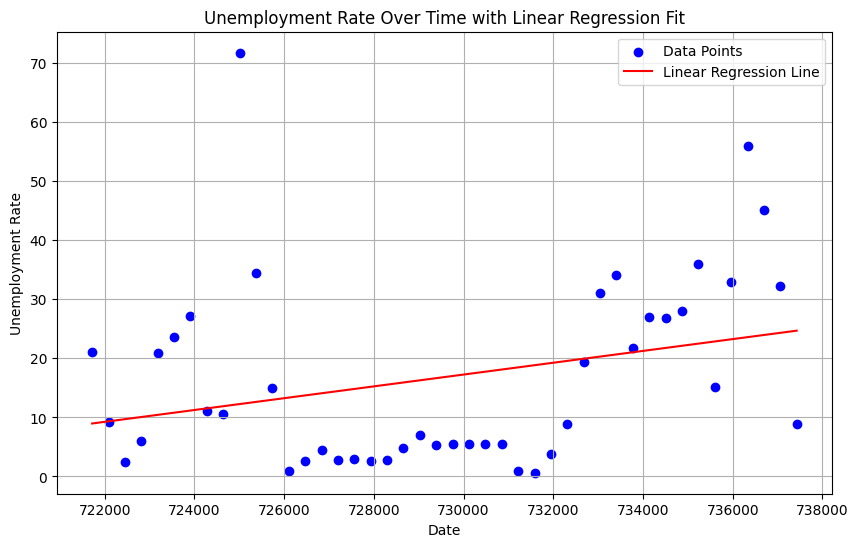

In [85]:
peaceplt.figure(figsize=(10, 6))
peaceplt.scatter(X, y, color='blue', label='Data Points')
peaceplt.plot(X, y_prediction, color='red', label='Linear Regression Line')
peaceplt.xlabel('Date')
peaceplt.ylabel('Unemployment Rate')
peaceplt.grid()
peaceplt.legend()
peaceplt.title('Unemployment Rate Over Time with Linear Regression Fit')
peaceplt.show()

# **QUESTION 4 - Model Fitting and Prediction**

In [86]:
df_Israel_Unemployment = peacepd.read_csv('/Israeli_Unemployment_Rate.csv')

In [87]:
df_Israel_Unemployment

,Date,Value
0,1980-12-31,4.780
1,1981-12-31,5.115
2,1982-12-31,5.048
3,1983-12-31,4.562
4,1984-12-31,5.893
5,1985-12-31,6.693
6,1986-12-31,7.078
7,1987-12-31,6.057
8,1988-12-31,6.428
9,1989-12-31,8.881


In [88]:
df_Israel_Unemployment.dtypes

,0
Date,object
Value,float64


In [89]:
# Convert Date to datetime

df_Israel_Unemployment['Date'] = peacepd.to_datetime(df_Israel_Unemployment['Date'])

In [90]:
start_date = '1980-12-31'
end_date = '2013-09-02'

df_Israel_Unemployment = df_Israel_Unemployment[(df_Israel_Unemployment['Date'] >= start_date) & (df_Israel_Unemployment['Date'] <= end_date)]

df_Israel_Unemployment['Date Ordinal'] = df_Israel_Unemployment['Date'].apply(lambda x: x.toordinal())

<ipython-input-90-6aed8b4c3597>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Israel_Unemployment['Date Ordinal'] = df_Israel_Unemployment['Date'].apply(lambda x: x.toordinal())


In [91]:
# Fit Linear Regression Model

X = df_Israel_Unemployment[['Date Ordinal']]
y = df_Israel_Unemployment['Value']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [92]:
# Predict Unemployment Rate by 2020

year_2020 = datetime.datetime(2020, 1, 1)
year_2020_ordinal = year_2020.toordinal()

unemployment_rate_2020 = model.predict([[year_2020_ordinal]])
print("Predicted Unemployment Rate in 2020:", unemployment_rate_2020[0])

Predicted Unemployment Rate in 2020: 11.939052835820178


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [93]:
# Evaluate Performance of Model

y_prediction = model.predict(X)

mean_percentage = mean_absolute_percentage_error(y, y_prediction)

print(f"Mean Absolute Percentage Error:, {mean_percentage * 100:.2f}%")

Mean Absolute Percentage Error:, 21.99%


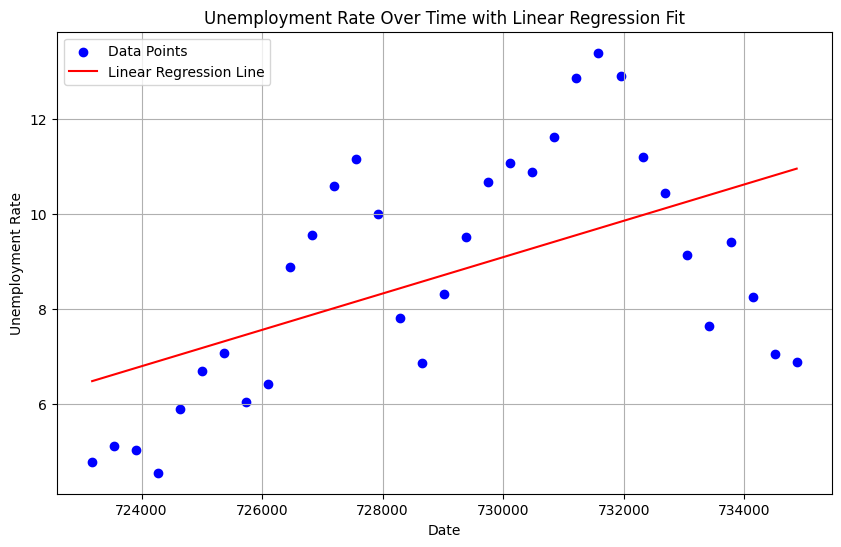

In [94]:
peaceplt.figure(figsize=(10, 6))
peaceplt.scatter(X, y, color='blue', label='Data Points')
peaceplt.plot(X, y_prediction, color='red', label='Linear Regression Line')
peaceplt.xlabel('Date')
peaceplt.ylabel('Unemployment Rate')
peaceplt.grid()
peaceplt.legend()
peaceplt.title('Unemployment Rate Over Time with Linear Regression Fit')
peaceplt.show()